# Importation and data preparation

- Importation

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics



STEP 1 : Importing and Feature Scaling


- Our dataset is not yet a scaled value, so we will scale our data using StandardScaler
- We will split the data into training and testing sets. We train the model with 70% of the samples and test with the remaining 20%

In [2]:
# import data
df=pd.read_csv("C:/Users/Dell 7470/Desktop/test_xcelerit/data_xcelerit.csv")
#data
x = df.drop('vola',axis=1) # features
y = df.vola                # target

In [3]:
# Scalling our data
sc = StandardScaler()
x = sc.fit_transform(x)

In [4]:
# spliting data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)


# Building Random Forest model

- After scaling our dataset, it is time to create our random forest algorithm 
- We then use the grid search cross validation method  from the sklearn library to determine the optimal values to be used for the hyperparameters of our model from a specified range of values. We have chosen the two hyperparameters : max_depth and n_estimators

In [6]:
# this function return the trained model also an array of R2 values 
def rfr_model(x_train,y_train):
    
    # Grid SearchCV 
    gsc = GridSearchCV( estimator=RandomForestRegressor(),param_grid={ 'max_depth': range(3,10),'n_estimators': (10, 50, 100, 1000),},cv=5, scoring='r2', verbose=0, n_jobs=-1)
    grid_result = gsc.fit(x_train,y_train)
    best_params = grid_result.best_params_
    
    # Model with optimal hyperparameters
    rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"], random_state=False, verbose=False)
    
    # Perform K-Fold CV
    scores = cross_val_score(rfr,x_train,y_train, cv=10, scoring='r2')
    
    
    return scores , rfr

In [7]:
(scor,rfr) = rfr_model(x_train, y_train)

In [11]:
rfr.max_depth
rfr.n_estimators

1000

In [12]:
# Training our model on our train data
model= rfr.fit(x_train,y_train)
y_pred = rfr.predict(x_test)


# Evaluating the model

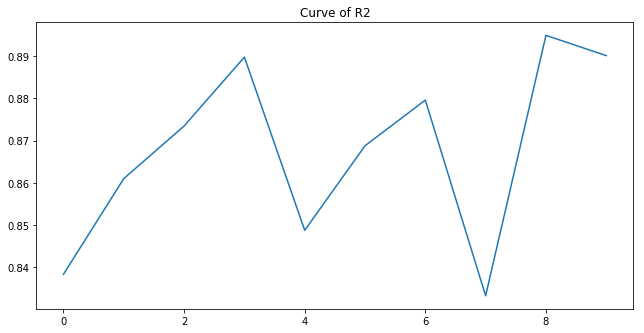

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10.7,5.27))
plt.plot(scor)
plt.title('Curve of R2')
plt.show()

In [15]:
# RMSE
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 0.017908196288933094


# Saving the model

In [16]:
import pickle
import os

path=input('Print your path to save your model :')
pickle.dump(model, open(os.path.join(path, 'Random_forest .pickle'), 'wb'), protocol=4)

Print your path to save your model :C:/Users/Dell 7470/Desktop/test_xcelerit
